In [ ]:
words = open('/content/names.txt', 'r').read().splitlines()

In [ ]:
len(words)

32033

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

In [ ]:
for w in words[:1]:
  for ch1, ch2 in zip(w, w[1:]):
    print(ch1, ch2)

e m
m m
m a


In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>'] # Start tokens
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
# Total number of sequences we expect:
# Regular letter-pairs: 26 x 26 = 676
# Special starting sequence: <S>, letter: 26
# Special ending sequence: letter, <E>: 26
# In total, 26 x 26 + 26 + 26 = 728 sequences.
# For each character-pair/sequence, we have an associated frequency
# Now, let us check from the dataset how many sequences we actually got.
len(b)

627

In [ ]:
# Only 627 sequences, which means that (728-627 = 101) sequences simply didn't
# exist in the dataset.
# Let us sort and inspect the dictionary
sorted_dict_desc = dict(sorted(b.items(), key=lambda item: item[1], reverse=True))
sorted_dict_desc

{('n', '<E>'): 6763,
 ('a', '<E>'): 6640,
 ('a', 'n'): 5438,
 ('<S>', 'a'): 4410,
 ('e', '<E>'): 3983,
 ('a', 'r'): 3264,
 ('e', 'l'): 3248,
 ('r', 'i'): 3033,
 ('n', 'a'): 2977,
 ('<S>', 'k'): 2963,
 ('l', 'e'): 2921,
 ('e', 'n'): 2675,
 ('l', 'a'): 2623,
 ('m', 'a'): 2590,
 ('<S>', 'm'): 2538,
 ('a', 'l'): 2528,
 ('i', '<E>'): 2489,
 ('l', 'i'): 2480,
 ('i', 'a'): 2445,
 ('<S>', 'j'): 2422,
 ('o', 'n'): 2411,
 ('h', '<E>'): 2409,
 ('r', 'a'): 2356,
 ('a', 'h'): 2332,
 ('h', 'a'): 2244,
 ('y', 'a'): 2143,
 ('i', 'n'): 2126,
 ('<S>', 's'): 2055,
 ('a', 'y'): 2050,
 ('y', '<E>'): 2007,
 ('e', 'r'): 1958,
 ('n', 'n'): 1906,
 ('y', 'n'): 1826,
 ('k', 'a'): 1731,
 ('n', 'i'): 1725,
 ('r', 'e'): 1697,
 ('<S>', 'd'): 1690,
 ('i', 'e'): 1653,
 ('a', 'i'): 1650,
 ('<S>', 'r'): 1639,
 ('a', 'm'): 1634,
 ('l', 'y'): 1588,
 ('<S>', 'l'): 1572,
 ('<S>', 'c'): 1542,
 ('<S>', 'e'): 1531,
 ('j', 'a'): 1473,
 ('r', '<E>'): 1377,
 ('n', 'e'): 1359,
 ('l', 'l'): 1345,
 ('i', 'l'): 1345,
 ('i', 's'): 131

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
# Better to keep it in a neat 2-D array.
# Rows = First character, Column = Second Character
# Will be using PyTorch


In [ ]:
import torch

a = torch.zeros((3, 5), dtype=torch.int64)
a

In [ ]:
N = torch.zeros((27, 27), dtype=torch.int64)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.'] # Start tokens
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

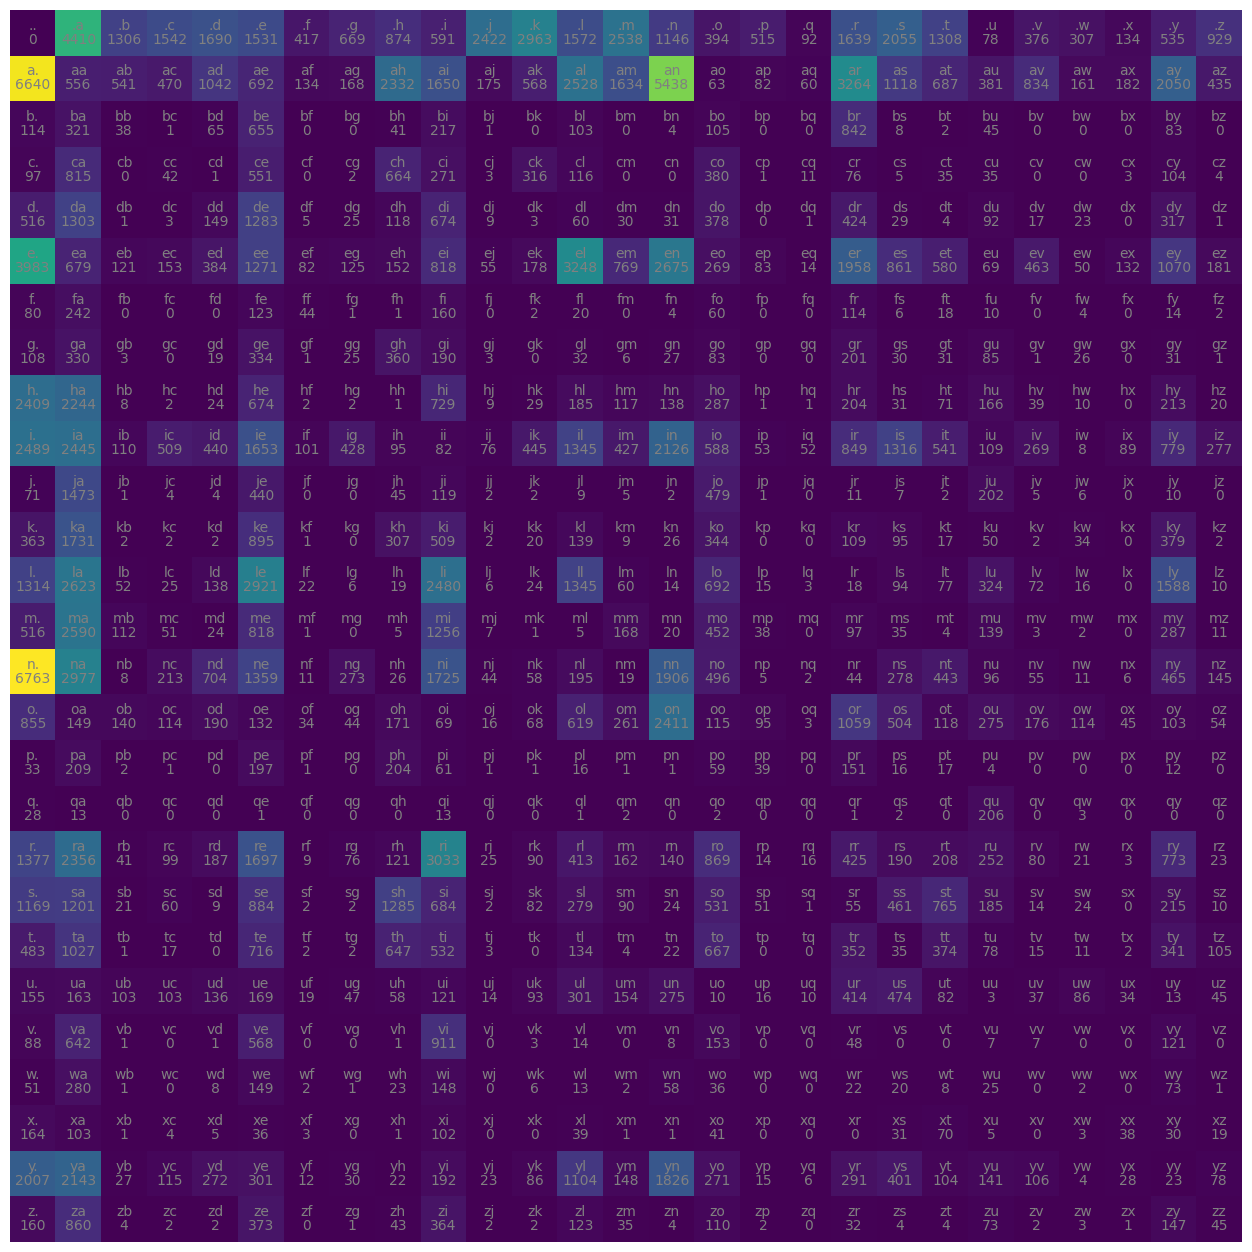

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

plt.imshow(N)

In [ ]:
 # This is the frequencies of sequences <.>, letter.
 # In other words, when the letter is the first letter.
 N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929])

In [ ]:
# The above is simply frequencies. We need to convert them into probabilities.
p = N[0].float()
p = p / p.sum()
p

# This gives the probability distribution of characters being the first character
# of a word.

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
# Now, we have a discrete probability distribution.
# We need a way to sample sequences from this distribution.
# Basically, we give the distribution, we keep can keep generating letters based
# on that distribution.
# Multinomial Distribution: https://pytorch.org/docs/stable/generated/torch.multinomial.html
# Generator Link: https://pytorch.org/docs/stable/generated/torch.Generator.html

# PyTorch's torch.multinomial does just that.
# We can give the distribution to it, and it will give back a number from our sample
# based on that distribution.

# Essentially, we get a number from 1 - 26 from it (0 has probability 0.000, so
# 0 is never generated)
# Getting 1-26 is akin to getting the character sequence.
# In this particular case, it is akin to getting a number of first characters for a word.

In [ ]:
g = torch.Generator().manual_seed(2147483647)

In [ ]:
# 1. Pass the probability distribution
# 2. Pass the number of samples we need
# 3. With or without replacement (classic probability term) - in this case, with replacement
#     makes sense because the same letter can come after it has already been generated.
# With some basic manipulation, we generate characters based on the given
# probability distribution.

index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[index]

'j'

In [ ]:
# P.sum(1) <--- Summing across the row (dimension-1). dim-0 is the column.
# keepdim=True will return us a 27x1 column vector (each value is the summation of each row values)
# We want to sum across the rows.

P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [ ]:
# Now, create the 27 x 27 probability distribution
# Each row value needs to be divided by its row-sum (computed in the previous cell)

# N:       027 x 27
# Row-Sum: 27 x 1

#P = N.float()
P = (N+1).float() # Model smoothing
P /= P.sum(1, keepdim=True) # keepdim is a life-saver.

In [ ]:
# Broadcasting Semantics Link: https://pytorch.org/docs/stable/notes/broadcasting.html

In [ ]:
# That is the first-character generator.
# It generates the word's first character.
# Say it generates 'l'. How do we go from there?
# We go back to our 27x27 tensor, we see the sequences starting with 'l'.
# We generate a probability distribution and use that distribution to generate
# a character.

# So we should ideally convert that 27 x 27 frequency matrix into a neat probability
# distribution matrix which can directly be used in character-generation.

In [ ]:
# Let us create a generative-loop, which keeps generating letters/sequences
# based on the probability distributions computed from the dataset.
g = torch.Generator().manual_seed(2147483647)
n = 10

for _ in range(n):

  # List that stores the generated characters
  out = []
  ix = 0

  # Single-word generating loop.
  while True:
    # Get the probability distribution on the fly.
    # p = N[ix].float()
    # p = p / p.sum()
    p = P[ix] # Directly get the probability from the distribution.

    # Create the generator object etc., for character-generation
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      # It is the end-token, come out of the loop.
      break

  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [ ]:
# Progress so far:

# 1. Trained the Bigram language model (meaning, we have build a neat
#    probability distribution which we learned from the data through
#    certain method - here, it is simple statistical modeling, nothing complicated)
# 2. A mechanism to sample from the model (aka, mechanism to generate characters based
#    on the model's probability distribution)

In [ ]:
# Next: How do we systematically evaluate performance of this model?

In [ ]:
from logging import log
log_likelihood = 0
n = 0 # Used to compute average negative log likelihood

for w in ["adwaithqq"]:
  chs = ['.'] + list(w) + ['.'] # Start tokens
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1}{ch2}: {prob:.4f}: {logprob:.4f}')

print("ll: ", log_likelihood)
# We need a loss function (semantics of lower is better)
# So, use the negative log likelihood
neg_log_likelihood = -log_likelihood
print("nll: ", neg_log_likelihood)
avg_neg_log_likelihood = neg_log_likelihood / n
print("avg nll: ", avg_neg_log_likelihood)

.a: 0.1376: -1.9835
ad: 0.0308: -3.4817
dw: 0.0043: -5.4386
wa: 0.2939: -1.2244
ai: 0.0487: -3.0224
it: 0.0306: -3.4876
th: 0.1158: -2.1561
hq: 0.0003: -8.2484
qq: 0.0033: -5.7004
q.: 0.0970: -2.3331
ll:  tensor(-37.0763)
nll:  tensor(37.0763)
avg nll:  tensor(3.7076)


In [ ]:
# And we arrive at Average Negative Log Likelihood
# This is used as the Loss Function and it should be reduced/optimized.

In [ ]:
# We need to increase the likelihood of the data
# Equivalent to maximizing the log likelihood
# Equivalent to minimizing the negative log likelihood
# In practice, the Average Negative Log Likelihood is used as Loss Function

In [ ]:
# Neural-Networks based Bigram Character Language Model

In [ ]:
# Compile the training set - a set containing all the bigrams

# Inputs and Targets
xs,ys = [],[]

for w in words[:1]:
  chs = ['.'] + list(w) + ['.'] # Start tokens
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# One-Hot Encoding
# Link: https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html

import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27)
xenc.shape

torch.Size([5, 27])

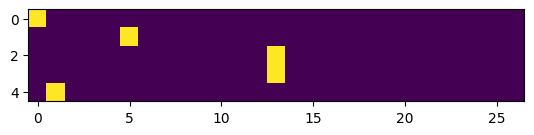

In [ ]:
plt.imshow(xenc)

In [ ]:
# We want a floating-point tensor as input to our Neural Network.
# So convert xenc

xenc = xenc.float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# NN

# Input is just the One-Hot encoding of integers.
# Input is 1 x 27

In [ ]:
# Start with Input Layer with 1 Neuron.
# The Input Layer has 27 Inputs coming in.
# Which means, the Input Layer Neuron should have 27 weights associated with it.

W = torch.randn((27, 1))

In [ ]:
# 5 inputs: 5 x 27
# Input Layer weights: 27 x 1
# Dot Product: 5 x 1

xenc @ W

tensor([[ 0.4364],
        [-0.5707],
        [ 0.7681],
        [ 0.7681],
        [-0.1225]])

In [ ]:
# What does this 5 x 1 tensor mean?
#tensor([[ 1.0568],
#        [-1.4018],
#        [-0.9616],
#        [-0.9616],
#        [ 0.0502]])
#
# Each one is simply the activation (aka summation of w*x) for every input

In [ ]:
# Model 2:
# Each input is 1 x 27, we have 5 such samples
# This model has 27 neurons in the input layer.
# Each element in 27 x 1 input is def as input to each of the 27 neurons.
# Each neuron has 27 inputs/weights. In total, 27 x 27 inputs/weights
# Activations: (5, 27) @ (27 x 27) = 5 x 27 (Each one of the columns for each input sample)

In [ ]:
W = torch.randn((27, 27))
xenc @ W

# These are all the activations for each neuron, from the 5 samples.

tensor([[-0.3607,  0.6022, -0.1669,  0.1311, -1.4297, -0.3940,  0.7449, -0.6692,
          1.2460, -0.1742,  1.0067, -1.7340, -1.9989, -1.3690,  2.5604,  0.8425,
          0.9925, -0.7569,  0.4668, -0.0541, -0.7898,  1.5053, -0.4725, -1.1693,
          0.3083, -1.1462,  2.6845],
        [-1.3311,  0.0255, -0.4251,  0.7269, -0.0379,  0.1134,  0.6100, -0.1261,
         -1.9213, -0.9855, -1.1219,  0.4082,  0.4198, -2.1560, -2.0935, -0.8261,
          0.6933,  0.4671, -0.3638,  0.5213,  0.4867, -0.4227, -0.4034,  0.6904,
          0.2208, -0.9114,  0.7742],
        [-0.1696, -0.8617, -1.2553, -0.7780,  1.8569,  0.2162, -0.5154,  0.2217,
         -0.4627,  0.7982,  0.9588, -0.1922,  0.8024, -0.3761, -1.2745,  1.1138,
         -0.1297, -0.9279,  0.2326,  0.4658,  0.0484,  0.0932,  1.3010, -0.6414,
         -0.7403,  0.5668,  0.3222],
        [-0.1696, -0.8617, -1.2553, -0.7780,  1.8569,  0.2162, -0.5154,  0.2217,
         -0.4627,  0.7982,  0.9588, -0.1922,  0.8024, -0.3761, -1.2745,  1.1138

In [ ]:
# For now, this will be our NN model
# Just 1 layer model with 27 neurons, and 27 inputs to each neuron.
# No bias, no non-linearity/activation function.

# For each input sample, we get a 1 x 27 output.
# What is that output? For us, what does it mean?

In [ ]:
# At 1:20:30, it is told that we interpret the output as Log-Counts (and not counts)
# So, exponentiating them will give the counts (not real counts, but we interpret it to be counts)
logits = xenc @ W     # Log-Counts
counts = logits.exp() # Equivalent to N

# Normalize the counts matrix to get our probabilities
# We interpret to be out probabilities
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0118, 0.0310, 0.0144, 0.0194, 0.0041, 0.0115, 0.0358, 0.0087, 0.0591,
         0.0143, 0.0465, 0.0030, 0.0023, 0.0043, 0.2199, 0.0395, 0.0458, 0.0080,
         0.0271, 0.0161, 0.0077, 0.0766, 0.0106, 0.0053, 0.0231, 0.0054, 0.2489],
        [0.0094, 0.0365, 0.0233, 0.0736, 0.0343, 0.0399, 0.0655, 0.0314, 0.0052,
         0.0133, 0.0116, 0.0535, 0.0541, 0.0041, 0.0044, 0.0156, 0.0712, 0.0568,
         0.0247, 0.0599, 0.0579, 0.0233, 0.0238, 0.0710, 0.0444, 0.0143, 0.0772],
        [0.0221, 0.0111, 0.0075, 0.0120, 0.1680, 0.0326, 0.0157, 0.0327, 0.0165,
         0.0583, 0.0684, 0.0216, 0.0585, 0.0180, 0.0073, 0.0799, 0.0230, 0.0104,
         0.0331, 0.0418, 0.0275, 0.0288, 0.0963, 0.0138, 0.0125, 0.0462, 0.0362],
        [0.0221, 0.0111, 0.0075, 0.0120, 0.1680, 0.0326, 0.0157, 0.0327, 0.0165,
         0.0583, 0.0684, 0.0216, 0.0585, 0.0180, 0.0073, 0.0799, 0.0230, 0.0104,
         0.0331, 0.0418, 0.0275, 0.0288, 0.0963, 0.0138, 0.0125, 0.0462, 0.0362],
        [0.0071, 0.0274,

In [ ]:
# Summary:
# 1. We have the input sample ".e"
# 2. We take the first character in the sequence '.'
# 3. Perform One-Hot encoding on it
# 4. Pass it to the 1-Layer 27-neuron Neural-Net
# 5. Neural-Net gives a 1 x 27 tensor
# 6. It is interpreted in a certain way, after a bunch of transformations,
#    we get numbers which are interpreted as probabilities for the next character.
#
#tensor([0.0652, 0.0981, 0.1135, 0.0434, 0.0178, 0.0315, 0.0355, 0.0736, 0.0420,
#        0.0136, 0.0523, 0.0158, 0.0650, 0.0760, 0.0124, 0.0218, 0.0214, 0.0412,
#        0.0387, 0.0184, 0.0148, 0.0123, 0.0057, 0.0047, 0.0093, 0.0334, 0.0227])
#
# 7. According to this example, there is a 9.81% chance of next character to be 'a'
# 8. A 11.35% chance of next character to be 'd'
# and so on.

probs[0]

tensor([0.0118, 0.0310, 0.0144, 0.0194, 0.0041, 0.0115, 0.0358, 0.0087, 0.0591,
        0.0143, 0.0465, 0.0030, 0.0023, 0.0043, 0.2199, 0.0395, 0.0458, 0.0080,
        0.0271, 0.0161, 0.0077, 0.0766, 0.0106, 0.0053, 0.0231, 0.0054, 0.2489])

In [ ]:
# Summary

In [ ]:
# Input dataset
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
# Target output
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [ ]:
# Forward Pass (excluding loss function computation)

xenc = F.one_hot(xs, num_classes=27).float() # input to the network, one-hot encoding
logits = xenc @ W   # predict log-counts

# Softmax
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # probabilities for the next character

In [ ]:
# Everything so far, all the functions are differentiable
# So the network is back-propagatable

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
# Loss Function Value
nlls = torch.zeros(5)

for i in range(5):
  # i-th bigram:
  x = xs[i].item()
  y = ys[i].item()
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)

  p = probs[i, y]

  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [ ]:
# We have completed the Forward Pass
# We have the mechanism to compute the loss function given an input

# We are ready for Backward Pass (and later learning/fine-tuning/nudging parameters)
# to optimize losss function

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# Forward Pass

xenc = F.one_hot(xs, num_classes=27).float() # input to the network, one-hot encoding
logits = xenc @ W   # predict log-counts

# Softmax
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # probabilities for the next character

# Loss
loss = -probs[torch.arange(5), ys].log().mean() # Probabilities the neural net assigns for the correct next character
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [ ]:
# Backward Pass
W.grad = None # Set to zero the gradient
loss.backward()

# PyTorch internally has a neat computational graph,
# using which backward goes smoothly. Beauty!

In [ ]:
# Learning/ Fine-Tuning/Nudging
W.data += -1 * W.grad

In [ ]:
# Putting it all together
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.'] # Start tokens
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# Initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# Gradient Descent
n = 10

for k in range(100):
  # Forward Pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network, one-hot encoding
  logits = xenc @ W   # predict log-counts

  # Softmax
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdim=True) # probabilities for the next character

  # Loss
  loss = -probs[torch.arange(num), ys].log().mean() # Probabilities the neural net assigns for the correct next character
  print(loss.item())

  # Backward Pass
  W.grad = None # Set to zero the gradient
  loss.backward()

  # Learning/ Fine-Tuning/Nudging
  W.data += -50 * W.grad


2.4842238426208496
2.457172155380249
2.455822467803955
2.4557764530181885
2.4557607173919678
2.4557526111602783
2.455746650695801
2.4557418823242188
2.4557383060455322
2.455734968185425
2.4557316303253174
2.455728769302368
2.455725908279419
2.455723524093628
2.455721139907837
2.4557180404663086
2.4557156562805176
2.4557130336761475
2.4557108879089355
2.4557082653045654
2.4557056427001953
2.4557032585144043
2.4557011127471924
2.4556989669799805
2.4556961059570312
2.4556939601898193
2.4556915760040283
2.4556891918182373
2.4556868076324463
2.4556846618652344
2.4556822776794434
2.4556798934936523
2.4556775093078613
2.4556753635406494
2.4556732177734375
2.4556705951690674
2.4556684494018555
2.4556663036346436
2.4556639194488525
2.4556615352630615
2.4556593894958496
2.4556570053100586
2.455655097961426
2.4556524753570557
2.455650568008423
2.455648422241211
2.455646276473999
2.455644130706787
2.455641508102417
2.455639362335205
2.4556374549865723
2.4556350708007812
2.4556326866149902
2.455631

In [ ]:
# Sampling/Generating from the neural-net model
g = torch.Generator().manual_seed(2147483647)

for _ in range(10):
  out = []
  ix = 0

  while True:
    # This is obviously part of the forward pass logic.
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # input to the network, one-hot encoding
    logits = xenc @ W   # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdim=True) # probabilities for the next character

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break

  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
